# Knife crime EDA

Exploritory data analysis of a dataset that covers knife crime in England and Wales.

There is absolutely no information given on this file and so I will have to figure out everything for myself.

Hopefully this is a good exercise in data exploration and understanding.

An xls version can be found here:

https://www.kaggle.com/iainagar/knife-crime-england-and-wales

In [1]:
# import the required modules

import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot

# set the graph style

sns.set_theme(style="darkgrid")

In [2]:
# import the file

df = pd.read_csv('knifecrime.csv', header=1)

df.head()

,QtrNum,Force Name,Region,Financial Year,Financial Quarter,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,41,Metropolitan Police,London,2018/19,Q1,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,39,Metropolitan Police,London,2017/18,Q3,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,38,Metropolitan Police,London,2017/18,Q2,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,13,Metropolitan Police,London,2011/12,Q1,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,12,Metropolitan Police,London,2010/11,Q4,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


As with every new dataset we must first check for any null values and fill them to alleviate any problems further down the line.

In [3]:
df.isnull().sum()

QtrNum                         0
Force Name                     0
Region                         0
Financial Year                 0
Financial Quarter              0
Population                     0
Knife enabled                  0
Violence with Injury           0
Homicide and serious injury    0
Knife Crime                    0
RateKE                         0
RateVWI                        0
RateKC                         0
ZScoreKE                       0
ZScoreVWI                      0
ZScoreKC                       0
dtype: int64

# Feature tidying

Looking at each column individually:

QtrNum is likely to be quarter number. We see that the top row has a QtrNum of 41, two higher than the row below with 39. Then if we look at the year and financial quarter, the first row is indeed two quarters later. This pattern then follows for the 3 rows below so it's safe to assume that we're correct with our hypothesis.

This one column nicely sums up the two columns 'Financial year' and 'Financial Quarter' but has the drawback of being ambiguous. It would be clearer but still concise to give a single column with the starting date of the quarter.

Counting back we find that the first quarter is Q1 of 2008/09 which corresponds to 04/2008.

In [4]:
# Define the function that will change the QtrNumber to an actual date

def to_date(number):
    number = int(number) -1
    
    year = 2008 + math.floor(number/4)
    
    month = ((3 + (number*3))%12)+1
    
    start = ''
    
    if month < 10:
        start = '0'
    
    return start + str(month) + '/' + str(year)

# Apply the function

df['QtrNum'] = df['QtrNum'].apply(to_date)

df.head()

,QtrNum,Force Name,Region,Financial Year,Financial Quarter,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,04/2018,Metropolitan Police,London,2018/19,Q1,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,10/2017,Metropolitan Police,London,2017/18,Q3,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,07/2017,Metropolitan Police,London,2017/18,Q2,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,04/2011,Metropolitan Police,London,2011/12,Q1,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,01/2010,Metropolitan Police,London,2010/11,Q4,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


Now we can rename the column and drop the redundant columns.

In [5]:
# Rename QtrNum

df = df.rename(columns={'QtrNum':'Date'})

# Drop 'Financial Year' and 'Financial Quarter'

df = df.drop(columns=['Financial Year', 'Financial Quarter'])

df.head()

,Date,Force Name,Region,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,04/2018,Metropolitan Police,London,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,10/2017,Metropolitan Police,London,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,07/2017,Metropolitan Police,London,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,04/2011,Metropolitan Police,London,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,01/2010,Metropolitan Police,London,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


Looking at the columns 'Force Name' and 'Region' it seems that for every unique value in one column there is a corresponding unique value in the other which would make one column redundant. Let's see if this is the case.

In [6]:
# cycle through each force name and check if it corresponds to multiple regions

hypothesis = True
for force_name in df['Force Name'].unique():
    if df[df['Force Name'] == force_name]['Region'].unique().shape[0] > 2:
        print(force_name)
        hypothesis = False

print('Our hypothesis is', str(hypothesis) + '.')

Our hypothesis is True.


This means that in terms of model building there is no value in having both features and so we'll drop the 'Force Name' column as Region is slightly clearer. Note that we'll have a similar case for the column 'Population' and so we'll also drop this column. Depending on what our model was trying to achieve would decide which column would be most useful, but in this case we'll arbitrarily choose Region to keep.

In [7]:
# drop the 'Force Name column'

df = df.drop(columns=['Force Name', 'Population'])

df.head()

,Date,Region,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,04/2018,London,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,10/2017,London,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,07/2017,London,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,04/2011,London,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,01/2010,London,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


The remaining columns give a number to 'Knife enabled', 'Violence with Injury', 'Homicide and serious injury' and 'Knife Crime' and then a rate or z-score for some each bar 'Homicide and serious injury'. Since the more serious offences have lower numbers than the less serious offences these scores are likely the number of instances for the regions in those periods. This suggests a slight error in the rates since they will correspond to the number of crimes by the population of the region, but the populations will change each year and thus affect the rates, this has been neglected here.

Let have a look at a correlation matrix get an initial feel for these columns.

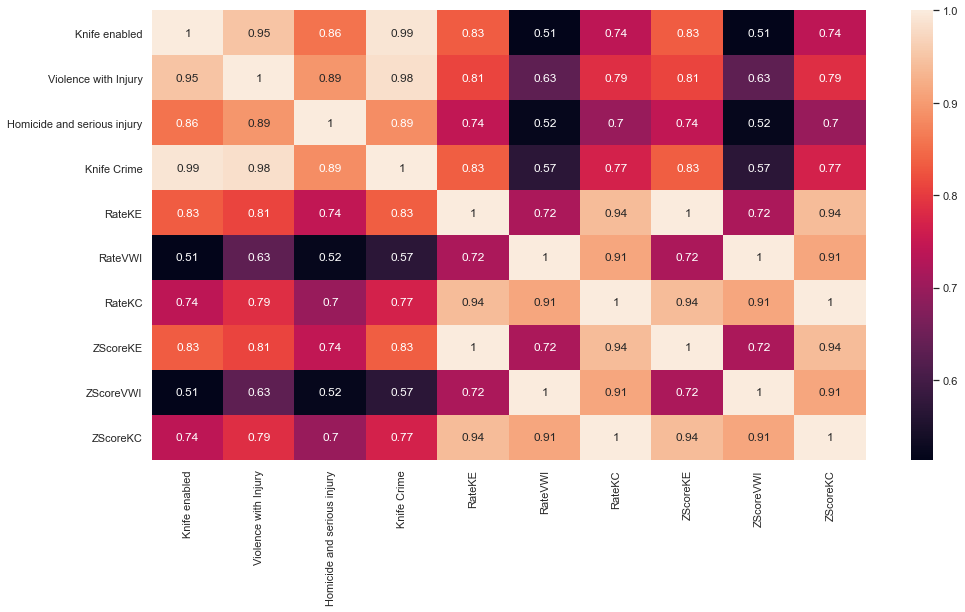

In [8]:
# calculate the matrix

corrMatrix = df.corr()

# set the plot size

a4_dims = (16, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)

# plot the matrix

ax = sns.heatmap(corrMatrix, annot=True)

What's very clear here is that the z-scores have a perfect correlation with each type of crime as one might expect since we are just subtracting and dividing by some constant. On the other hand the rates are not so very well correlated and in fact are roughly equally correlated with all rates of any given crime.

# Data exploration

In this section we'll try and answer some useful questions.

**Which region on average has the higest rate of knife crime?**

In [9]:
df[['Region', 'RateKC']].groupby(['Region']).mean().sort_values(by=['RateKC'], ascending=False)

,RateKC
Region,
London,3.492420
West Midlands,1.207651
Yorkshire,1.169108
North West,1.151705
East Midlands,1.094725
North East,0.889129
East,0.872139
South West,0.681523
South East,0.674813


The answer is quite clearly London by a large margin with Wales having the lowest average rate of knife crime.

**In which region have the least homicides or serious injuries due to knfe crime taken place?**

In [10]:
df[['Region', 'Homicide and serious injury']].groupby(['Region']).sum().sort_values(by=['Homicide and serious injury'])

,Homicide and serious injury
Region,
North East,188
Wales,206
South West,419
East Midlands,437
South East,494
East,511
Yorkshire,531
North West,717
West Midlands,725


We find that the North East of England has suffered the least amount of homicides or serious injuries.

**How many knife crime events will lead to violence with injury?**

In [11]:
rate = ((df['Violence with Injury'].sum()/df['Knife Crime'].sum()) * 100).round()

print(str(rate)[:2] + '% of knife crimes lead to violence with injury.')

53% of knife crimes lead to violence with injury.
